In [1]:
# 🧠 Emotion Detection from Text
# This notebook builds a text classification model to detect emotions 
# using TF-IDF features and Logistic Regression.

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib


In [2]:
# Step 2: Load Data
# Make sure to update the path if needed
train_df = pd.read_csv('training.csv')
val_df = pd.read_csv('validation.csv')

# Combine training and validation for more data
df = pd.concat([train_df, val_df]).reset_index(drop=True)
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
# Step 3: Label Mapping
label_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

df['emotion'] = df['label'].map(label_map)
df[['text', 'emotion']].head()


,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


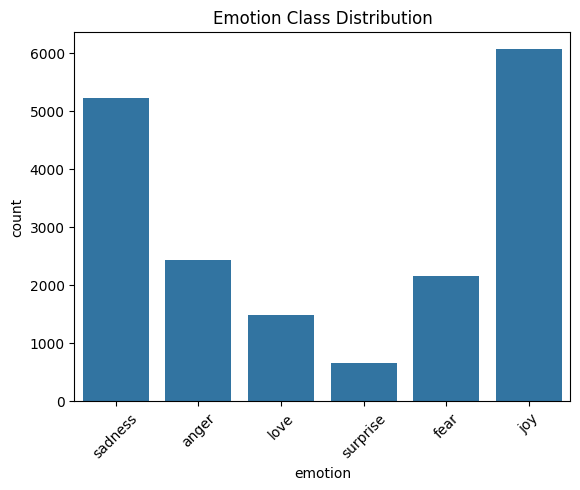

In [4]:
# Step 4: Visualize Class Distribution
sns.countplot(data=df, x='emotion')
plt.title('Emotion Class Distribution')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Step 5: Preprocessing and TF-IDF Vectorization
X = df['text']
y = df['emotion']

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, stratify=y, random_state=42)


In [6]:
# Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

       anger       0.91      0.80      0.85       487
        fear       0.89      0.80      0.84       430
         joy       0.82      0.95      0.88      1213
        love       0.84      0.66      0.74       296
     sadness       0.90      0.92      0.91      1043
    surprise       0.86      0.53      0.66       131

    accuracy                           0.87      3600
   macro avg       0.87      0.78      0.82      3600
weighted avg       0.87      0.87      0.86      3600



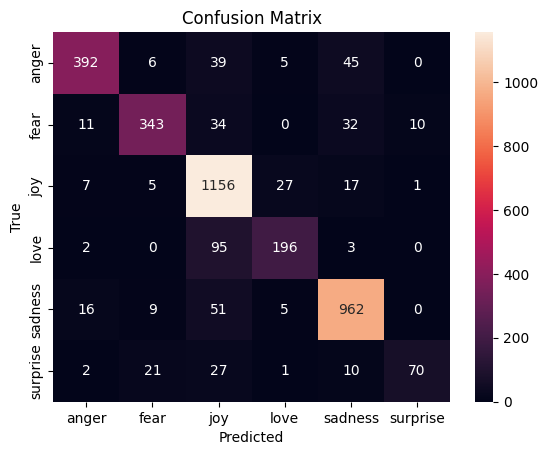

In [7]:
# Step 7: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(conf_mat, annot=True, fmt='d', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Step 8: Save Model and Vectorizer
joblib.dump(model, "emotion_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("Model and vectorizer saved!")


Model and vectorizer saved!


In [23]:
# Load and test saved model
loaded_model = joblib.load("emotion_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

sample = "i was fee "
sample_vec = loaded_vectorizer.transform([sample])
pred = loaded_model.predict(sample_vec)

print("Detected Emotion:", pred[0])


Detected Emotion: joy


In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 86.64%
